In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Sequential

In [3]:
train_df = pd.read_csv('../input/plant-pathology-2020-fgvc7/train.csv')
test_df = pd.read_csv('../input/plant-pathology-2020-fgvc7/test.csv')

In [4]:
train_df.head()

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0


In [5]:
train_df['label'] = train_df.apply(lambda x: np.argmax(x[1:]),axis=1)

In [6]:
train_df.head()

,image_id,healthy,multiple_diseases,rust,scab,label
0,Train_0,0,0,0,1,3
1,Train_1,0,1,0,0,1
2,Train_2,1,0,0,0,0
3,Train_3,0,0,1,0,2
4,Train_4,1,0,0,0,0


In [7]:
from PIL import Image
img = Image.open('../input/plant-pathology-2020-fgvc7/images/Train_0.jpg')
nparr  = np.asarray(img)

In [8]:
nparr.shape

(1365, 2048, 3)

In [9]:
import os
label_encode = {0:"healthy",1:"multiple_diseases",2:"rust",3:"scab"}




In [10]:
train_df.shape

(1821, 6)

In [11]:
train_df.iloc[0]['image_id']

'Train_0'

In [12]:
from sklearn.model_selection import train_test_split

train_df,validate_df = train_test_split(train_df,test_size=0.2)

In [16]:
new_img_size = (224,224)

In [21]:
img = Image.open(f'../input/plant-pathology-2020-fgvc7/images/{train_df.iloc[0]["image_id"]}.jpg')
img=img.resize(new_img_size)
images_train = np.array([np.asarray(img)])

for i in range(1,train_df.shape[0]):
    img = Image.open(f'../input/plant-pathology-2020-fgvc7/images/{train_df.iloc[i]["image_id"]}.jpg')
    img = img.resize(new_img_size)
    images_train = np.concatenate((images_train,np.array([np.asarray(img)])),axis=0)


In [22]:
img = Image.open(f'../input/plant-pathology-2020-fgvc7/images/{validate_df.iloc[0]["image_id"]}.jpg')
img=img.resize(new_img_size)
images_validate = np.array([np.asarray(img)])
for i in range(1,validate_df.shape[0]):
    img = Image.open(f'../input/plant-pathology-2020-fgvc7/images/{validate_df.iloc[i]["image_id"]}.jpg')
    img = img.resize(new_img_size)
    images_validate = np.concatenate((images_validate,np.array([np.asarray(img)])),axis=0)

In [23]:
img = Image.open(f'../input/plant-pathology-2020-fgvc7/images/{test_df.iloc[0]["image_id"]}.jpg')
img=img.resize(new_img_size)
images_test = np.array([np.asarray(img)])
for i in range(1,test_df.shape[0]):
    img = Image.open(f'../input/plant-pathology-2020-fgvc7/images/{test_df.iloc[i]["image_id"]}.jpg')
    img = img.resize(new_img_size)
    images_test = np.concatenate((images_test,np.array([np.asarray(img)])),axis=0)

In [24]:
print("Training set is of shape : ",images_train.shape)
print("Validation set is of shape : ",images_validate.shape)
print("Test set is of shape : ",images_test.shape)

Training set is of shape :  (1456, 224, 224, 3)
Validation set is of shape :  (365, 224, 224, 3)
Test set is of shape :  (1821, 224, 224, 3)


## Model building

Lets start with a base CNN model

In [26]:
model = Sequential([
    layers.Rescaling(1./255.,input_shape=(224,224,3)),
    layers.Conv2D(8,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.2),
    layers.Conv2D(16,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.2),
    layers.Conv2D(32,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(256,activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dense(4,activation='softmax'),   
])
model.build()

2022-04-11 18:01:02.007174: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-11 18:01:02.089203: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-11 18:01:02.089985: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-11 18:01:02.092520: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [31]:
model.compile(
    optimizer='adam',
    loss = tf.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [33]:
batch_size = 32
epochs = 15

model.fit(
    images_train,
    train_df['label'],
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(images_validate,validate_df['label'])
)

2022-04-11 18:05:26.636516: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/15


2022-04-11 18:05:27.890193: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


46/46 [==============================] - 8s 23ms/step - loss: 1.4171 - accuracy: 0.3352 - val_loss: 1.3118 - val_accuracy: 0.3479
Epoch 2/15
46/46 [==============================] - 1s 13ms/step - loss: 1.2313 - accuracy: 0.3599 - val_loss: 1.3086 - val_accuracy: 0.4822
Epoch 3/15
46/46 [==============================] - 1s 13ms/step - loss: 1.2134 - accuracy: 0.3929 - val_loss: 1.2460 - val_accuracy: 0.4493
Epoch 4/15
46/46 [==============================] - 1s 13ms/step - loss: 1.1642 - accuracy: 0.4677 - val_loss: 1.1878 - val_accuracy: 0.4603
Epoch 5/15
46/46 [==============================] - 1s 15ms/step - loss: 1.0921 - accuracy: 0.5117 - val_loss: 1.2131 - val_accuracy: 0.4301
Epoch 6/15
46/46 [==============================] - 1s 16ms/step - loss: 1.0074 - accuracy: 0.5659 - val_loss: 1.1987 - val_accuracy: 0.4658
Epoch 7/15
46/46 [==============================] - 1s 14ms/step - loss: 0.9114 - accuracy: 0.6174 - val_loss: 1.2034 - val_accuracy: 0.4438
Epoch 8/15
46/46 [======

In [46]:
data_augmentaion = Sequential([
    layers.RandomRotation(factor=(-0.2,0.2),seed = 123),
    layers.RandomZoom(0.1),
])

In [49]:
model = Sequential([
    layers.Rescaling(1./255.,input_shape=(224,224,3)),
    data_augmentaion,
    layers.Conv2D(8,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.2),
    layers.Conv2D(16,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.2),
    layers.Conv2D(32,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.4),
    layers.Flatten(),
    layers.Dense(256,activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dense(4,activation='softmax'),   
])
model.build()

In [50]:
model.compile(
    optimizer='adam',
    loss = tf.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

batch_size = 32
epochs = 50

history = model.fit(
    images_train,
    train_df['label'],
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(images_validate,validate_df['label'])
)

Epoch 1/50
46/46 [==============================] - 2s 21ms/step - loss: 1.2686 - accuracy: 0.3255 - val_loss: 1.2975 - val_accuracy: 0.3233
Epoch 2/50
46/46 [==============================] - 1s 16ms/step - loss: 1.2373 - accuracy: 0.3516 - val_loss: 1.2512 - val_accuracy: 0.4466
Epoch 3/50
46/46 [==============================] - 1s 16ms/step - loss: 1.2402 - accuracy: 0.3681 - val_loss: 1.2226 - val_accuracy: 0.4219
Epoch 4/50
46/46 [==============================] - 1s 16ms/step - loss: 1.2073 - accuracy: 0.4080 - val_loss: 1.1895 - val_accuracy: 0.5260
Epoch 5/50
46/46 [==============================] - 1s 15ms/step - loss: 1.1904 - accuracy: 0.4231 - val_loss: 1.1475 - val_accuracy: 0.6082
Epoch 6/50
46/46 [==============================] - 1s 15ms/step - loss: 1.1597 - accuracy: 0.4712 - val_loss: 1.1331 - val_accuracy: 0.5288
Epoch 7/50
46/46 [==============================] - 1s 16ms/step - loss: 1.0998 - accuracy: 0.5584 - val_loss: 1.0047 - val_accuracy: 0.6301
Epoch 8/50
46

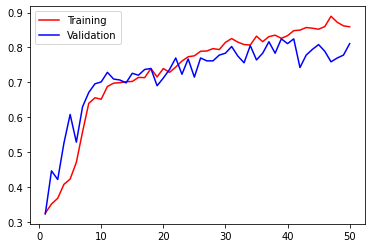

In [59]:
train_acc = history.history['accuracy']
validate_acc = history.history['val_accuracy']
epoch_ = range(1,epochs+1)

plt.plot(epoch_,train_acc,'r',label='Training')
plt.plot(epoch_,validate_acc,'b',label='Validation')
plt.legend()
plt.show()

In [61]:
predictions = model.predict(images_test)

In [62]:
predictions.shape

(1821, 4)

In [70]:
predictions_df = pd.DataFrame(np.round(predictions,2))
submission_df = pd.concat([test_df,predictions_df],axis=1)

In [71]:
submission_df.head()

,image_id,0,1,2,3
0,Test_0,0.00,0.12,0.88,0.00
1,Test_1,0.00,0.00,1.00,0.00
2,Test_2,0.71,0.02,0.00,0.27
3,Test_3,0.69,0.00,0.00,0.30
4,Test_4,0.00,0.00,1.00,0.00


In [74]:
submission_df.to_csv("submission.csv",index=False)